In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('../../Data/rejected.csv')

In [4]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

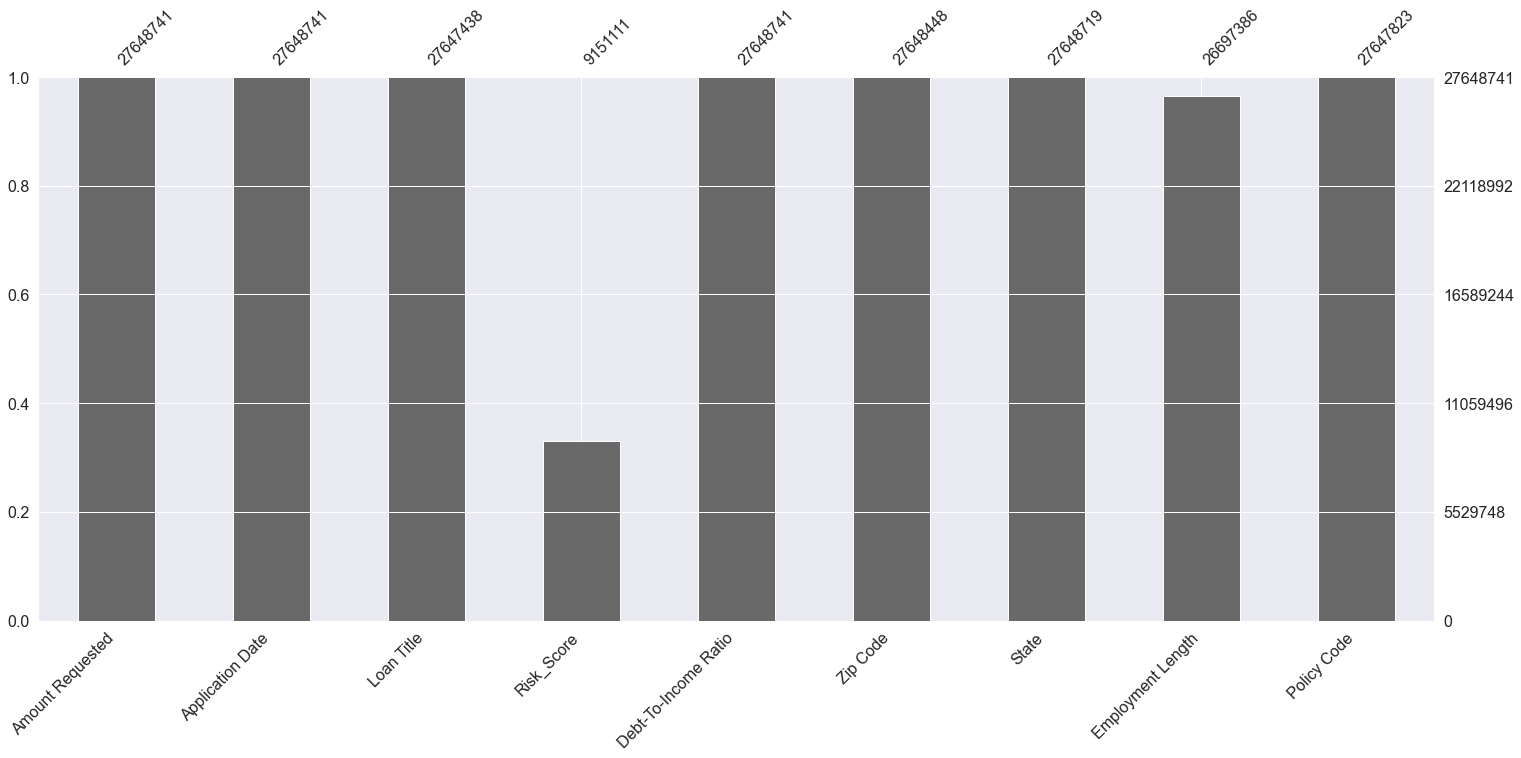

In [5]:
msnum.bar(rejected);

In [6]:
r = rejected.dropna().reset_index(drop=True)

In [7]:
r

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
8992190,30000.0,2016-12-31,Debt consolidation,681.0,55.15%,726xx,AR,< 1 year,0.0
8992191,1000.0,2016-12-31,Debt consolidation,531.0,31.31%,761xx,TX,< 1 year,0.0
8992192,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
8992193,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0


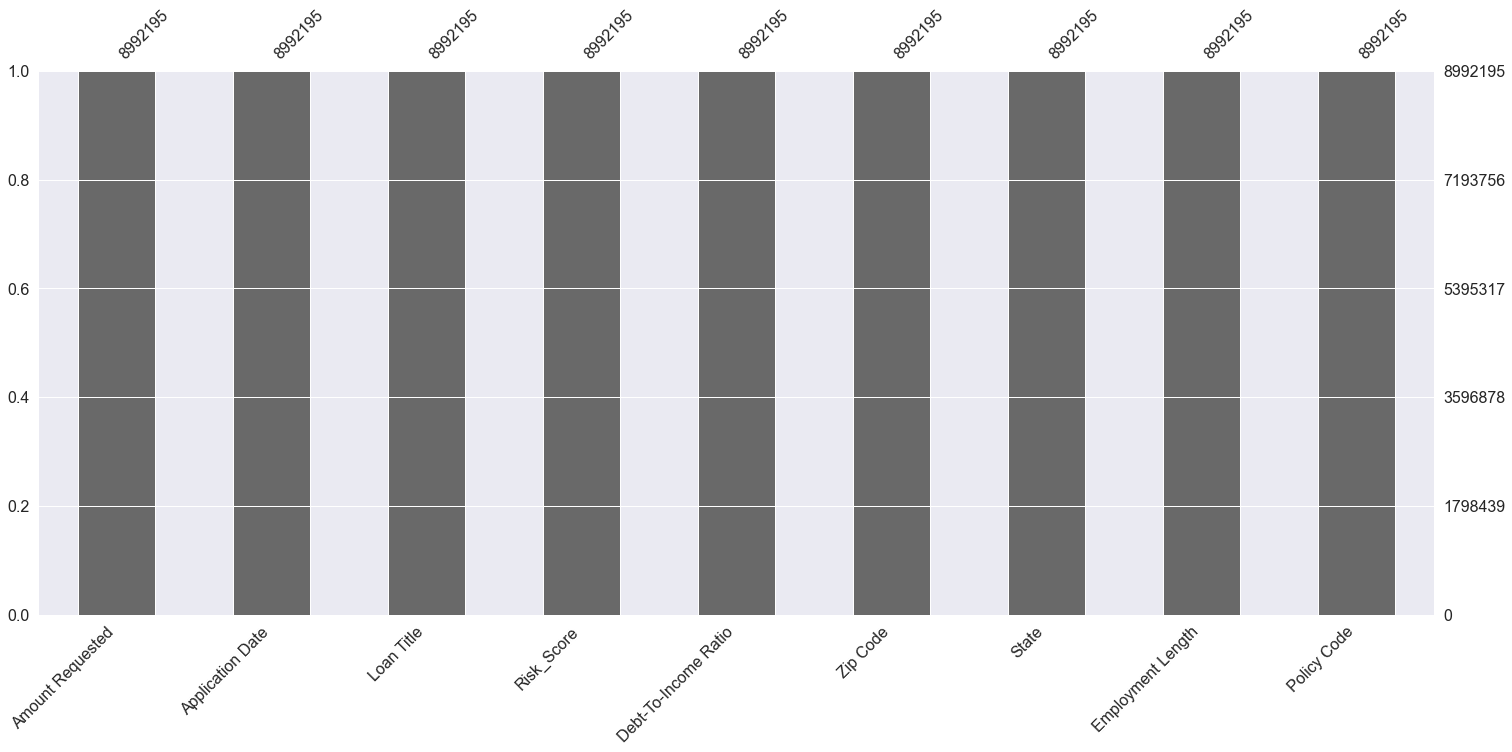

In [8]:
msnum.bar(r);

In [9]:
r = r[['Amount Requested','Risk_Score', 'Debt-To-Income Ratio', 'Employment Length', 'Loan Title']]
r

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Loan Title
0,1000.0,693.0,10%,4 years,Wedding Covered but No Honeymoon
1,1000.0,703.0,10%,< 1 year,Consolidating Debt
2,11000.0,715.0,10%,1 year,Want to consolidate my debt
3,6000.0,698.0,38.64%,< 1 year,waksman
4,1500.0,509.0,9.43%,< 1 year,mdrigo
...,...,...,...,...,...
8992190,30000.0,681.0,55.15%,< 1 year,Debt consolidation
8992191,1000.0,531.0,31.31%,< 1 year,Debt consolidation
8992192,10000.0,590.0,41.26%,< 1 year,Debt consolidation
8992193,1200.0,686.0,10.26%,< 1 year,Other


In [10]:
r.dtypes

Amount Requested        float64
Risk_Score              float64
Debt-To-Income Ratio     object
Employment Length        object
Loan Title               object
dtype: object

In [11]:
#r = r[['Risk_Score', 'Debt-To-Income Ratio']]
#r

In [12]:
r = r.rename(columns={"Debt-To-Income Ratio":"DI"})

In [13]:
r

,Amount Requested,Risk_Score,DI,Employment Length,Loan Title
0,1000.0,693.0,10%,4 years,Wedding Covered but No Honeymoon
1,1000.0,703.0,10%,< 1 year,Consolidating Debt
2,11000.0,715.0,10%,1 year,Want to consolidate my debt
3,6000.0,698.0,38.64%,< 1 year,waksman
4,1500.0,509.0,9.43%,< 1 year,mdrigo
...,...,...,...,...,...
8992190,30000.0,681.0,55.15%,< 1 year,Debt consolidation
8992191,1000.0,531.0,31.31%,< 1 year,Debt consolidation
8992192,10000.0,590.0,41.26%,< 1 year,Debt consolidation
8992193,1200.0,686.0,10.26%,< 1 year,Other


In [14]:
r['DI'] = r['DI'].str.rstrip("%").astype(float)/100

In [15]:
r

,Amount Requested,Risk_Score,DI,Employment Length,Loan Title
0,1000.0,693.0,0.1000,4 years,Wedding Covered but No Honeymoon
1,1000.0,703.0,0.1000,< 1 year,Consolidating Debt
2,11000.0,715.0,0.1000,1 year,Want to consolidate my debt
3,6000.0,698.0,0.3864,< 1 year,waksman
4,1500.0,509.0,0.0943,< 1 year,mdrigo
...,...,...,...,...,...
8992190,30000.0,681.0,0.5515,< 1 year,Debt consolidation
8992191,1000.0,531.0,0.3131,< 1 year,Debt consolidation
8992192,10000.0,590.0,0.4126,< 1 year,Debt consolidation
8992193,1200.0,686.0,0.1026,< 1 year,Other


In [16]:
r = r.assign(Accepted = 0)
r

,Amount Requested,Risk_Score,DI,Employment Length,Loan Title,Accepted
0,1000.0,693.0,0.1000,4 years,Wedding Covered but No Honeymoon,0
1,1000.0,703.0,0.1000,< 1 year,Consolidating Debt,0
2,11000.0,715.0,0.1000,1 year,Want to consolidate my debt,0
3,6000.0,698.0,0.3864,< 1 year,waksman,0
4,1500.0,509.0,0.0943,< 1 year,mdrigo,0
...,...,...,...,...,...,...
8992190,30000.0,681.0,0.5515,< 1 year,Debt consolidation,0
8992191,1000.0,531.0,0.3131,< 1 year,Debt consolidation,0
8992192,10000.0,590.0,0.4126,< 1 year,Debt consolidation,0
8992193,1200.0,686.0,0.1026,< 1 year,Other,0


In [17]:
r.dtypes

Amount Requested     float64
Risk_Score           float64
DI                   float64
Employment Length     object
Loan Title            object
Accepted               int64
dtype: object

In [18]:
r.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,8.992195e+06,8.992195e+06,8.992195e+06,8992195.0
mean,1.263456e+04,6.273498e+02,1.695741e+00,0.0
std,1.090297e+04,8.993268e+01,1.776824e+02,0.0
min,1.500000e+02,0.000000e+00,-1.000000e-02,0.0
25%,4.000000e+03,5.910000e+02,9.060000e-02,0.0
50%,1.000000e+04,6.360000e+02,2.055000e-01,0.0
75%,2.000000e+04,6.740000e+02,3.626000e-01,0.0
max,1.400000e+06,9.900000e+02,5.000003e+05,0.0


In [19]:
accepted = pd.read_csv('../../Data/accepted.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
accepted

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,793

In [21]:
a = accepted[['loan_amnt', 'issue_d', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length', 'addr_state', 'policy_code']]

In [22]:
a.shape

(2260701, 9)

In [23]:
a.isnull().sum()

loan_amnt              33
issue_d                33
purpose                33
fico_range_low         33
fico_range_high        33
annual_inc             37
emp_length         146940
addr_state             33
policy_code            33
dtype: int64

In [24]:
a[a.annual_inc == 0] 

,loan_amnt,issue_d,purpose,fico_range_low,fico_range_high,annual_inc,emp_length,addr_state,policy_code
18202,20000.0,Dec-2015,debt_consolidation,685.0,689.0,0.0,NaN,TX,1.0
65620,3700.0,Nov-2015,credit_card,680.0,684.0,0.0,NaN,TX,1.0
421705,40000.0,Mar-2018,home_improvement,695.0,699.0,0.0,NaN,TX,1.0
422321,40000.0,Mar-2018,debt_consolidation,755.0,759.0,0.0,NaN,WA,1.0
422379,3000.0,Mar-2018,other,790.0,794.0,0.0,2 years,AR,1.0
...,...,...,...,...,...,...,...,...,...
2228436,8750.0,Oct-2016,debt_consolidation,715.0,719.0,0.0,NaN,AR,1.0
2228456,18000.0,Oct-2016,debt_consolidation,680.0,684.0,0.0,< 1 year,NY,1.0
2230378,10000.0,Oct-2016,credit_card,705.0,709.0,0.0,NaN,MD,1.0
2232830,23950.0,Oct-2016,debt_consolidation,670.0,674.0,0.0,NaN,IL,1.0


In [25]:
a = a.drop(a[a.annual_inc == 0].index)

In [26]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [27]:
a = a.assign(Accepted = 1)

In [28]:
a = a.rename(columns={"FICO":"Risk_Score"})

In [29]:
a = a.rename(columns={'purpose':"Loan Title"})

In [30]:
a = a.rename(columns={'loan_amnt':'Amount Requested'})

In [32]:
a = a.assign(DI = (a['Amount Requested'] / a['annual_inc']))

In [33]:
a = a[['Amount Requested','Risk_Score', 'DI', 'emp_length', 'Loan Title', 'Accepted']]

In [34]:
a = a.rename(columns={"emp_length":"Employment Length"})

In [35]:
a

,Amount Requested,Risk_Score,DI,Employment Length,Loan Title,Accepted
0,3600.0,677.0,0.065455,10+ years,debt_consolidation,1
1,24700.0,717.0,0.380000,10+ years,small_business,1
2,20000.0,697.0,0.317460,10+ years,home_improvement,1
3,35000.0,787.0,0.318182,10+ years,debt_consolidation,1
4,10400.0,697.0,0.099585,3 years,major_purchase,1
...,...,...,...,...,...,...
2260696,40000.0,707.0,0.176211,9 years,debt_consolidation,1
2260697,24000.0,662.0,0.218182,6 years,debt_consolidation,1
2260698,14000.0,662.0,0.147368,10+ years,debt_consolidation,1
2260699,NaN,NaN,NaN,NaN,NaN,1


In [36]:
a.isna().sum()

Amount Requested         33
Risk_Score               33
DI                       37
Employment Length    145373
Loan Title               33
Accepted                  0
dtype: int64

In [37]:
a['Employment Length'] = a['Employment Length'].replace(np.nan, 'None')

In [38]:
a

,Amount Requested,Risk_Score,DI,Employment Length,Loan Title,Accepted
0,3600.0,677.0,0.065455,10+ years,debt_consolidation,1
1,24700.0,717.0,0.380000,10+ years,small_business,1
2,20000.0,697.0,0.317460,10+ years,home_improvement,1
3,35000.0,787.0,0.318182,10+ years,debt_consolidation,1
4,10400.0,697.0,0.099585,3 years,major_purchase,1
...,...,...,...,...,...,...
2260696,40000.0,707.0,0.176211,9 years,debt_consolidation,1
2260697,24000.0,662.0,0.218182,6 years,debt_consolidation,1
2260698,14000.0,662.0,0.147368,10+ years,debt_consolidation,1
2260699,NaN,NaN,NaN,None,NaN,1


In [39]:
a.shape

(2259034, 6)

In [40]:
a.isna().sum()

Amount Requested     33
Risk_Score           33
DI                   37
Employment Length     0
Loan Title           33
Accepted              0
dtype: int64

In [41]:
a = a.dropna()

In [42]:
a.isna().sum()

Amount Requested     0
Risk_Score           0
DI                   0
Employment Length    0
Loan Title           0
Accepted             0
dtype: int64

In [43]:
a.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,2.258997e+06,2.258997e+06,2.258997e+06,2258997.0
mean,1.504390e+04,7.005790e+02,5.738792e-01,1.0
std,9.188089e+03,3.300490e+01,8.876415e+01,0.0
min,5.000000e+02,6.120000e+02,1.612903e-04,1.0
25%,8.000000e+03,6.770000e+02,1.250000e-01,1.0
50%,1.290000e+04,6.920000e+02,2.000000e-01,1.0
75%,2.000000e+04,7.170000e+02,2.985075e-01,1.0
max,4.000000e+04,8.475000e+02,4.000000e+04,1.0


In [44]:
a.shape

(2258997, 6)

In [45]:
r.head(2)

,Amount Requested,Risk_Score,DI,Employment Length,Loan Title,Accepted
0,1000.0,693.0,0.1,4 years,Wedding Covered but No Honeymoon,0
1,1000.0,703.0,0.1,< 1 year,Consolidating Debt,0


In [46]:
a.head(2)

,Amount Requested,Risk_Score,DI,Employment Length,Loan Title,Accepted
0,3600.0,677.0,0.065455,10+ years,debt_consolidation,1
1,24700.0,717.0,0.380000,10+ years,small_business,1


In [47]:
combo = pd.concat([a,r]).reset_index(drop=True)
combo

,Amount Requested,Risk_Score,DI,Employment Length,Loan Title,Accepted
0,3600.0,677.0,0.065455,10+ years,debt_consolidation,1
1,24700.0,717.0,0.380000,10+ years,small_business,1
2,20000.0,697.0,0.317460,10+ years,home_improvement,1
3,35000.0,787.0,0.318182,10+ years,debt_consolidation,1
4,10400.0,697.0,0.099585,3 years,major_purchase,1
...,...,...,...,...,...,...
11251187,30000.0,681.0,0.551500,< 1 year,Debt consolidation,0
11251188,1000.0,531.0,0.313100,< 1 year,Debt consolidation,0
11251189,10000.0,590.0,0.412600,< 1 year,Debt consolidation,0
11251190,1200.0,686.0,0.102600,< 1 year,Other,0


In [48]:
combo.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,1.125119e+07,1.125119e+07,1.125119e+07,1.125119e+07
mean,1.311830e+04,6.420526e+02,1.470495e+00,2.007785e-01
std,1.062491e+04,8.685177e+01,1.637510e+02,4.005827e-01
min,1.500000e+02,0.000000e+00,-1.000000e-02,0.000000e+00
25%,5.000000e+03,6.040000e+02,1.000000e-01,0.000000e+00
50%,1.000000e+04,6.540000e+02,2.038000e-01,0.000000e+00
75%,2.000000e+04,6.890000e+02,3.458000e-01,0.000000e+00
max,1.400000e+06,9.900000e+02,5.000003e+05,1.000000e+00


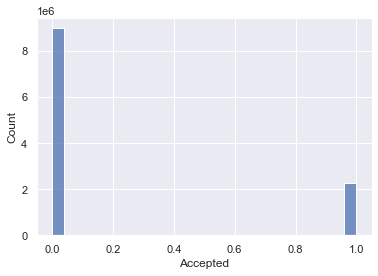

In [49]:
sns.histplot(data=combo, x='Accepted');

In [50]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [51]:
few.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,11251.000000,11251.000000,11251.000000,11251.000000
mean,13052.095369,641.597725,1.968689,0.200782
std,10514.027894,88.669122,87.069558,0.400603
min,1000.000000,0.000000,-0.010000,0.000000
25%,5000.000000,603.000000,0.099850,0.000000
50%,10000.000000,654.000000,0.200758,0.000000
75%,20000.000000,689.000000,0.345500,0.000000
max,47950.000000,949.000000,8592.000000,1.000000


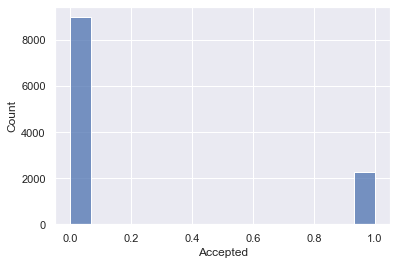

In [52]:
sns.histplot(data=few, x='Accepted');

In [53]:
few.isna().sum()

Amount Requested     0
Risk_Score           0
DI                   0
Employment Length    0
Loan Title           0
Accepted             0
dtype: int64

In [54]:
from pycaret.classification import *

In [55]:
experiment = setup(data = few, target = 'Accepted', categorical_features = ['Employment Length', 'Loan Title'])

,Description,Value
0,session_id,650
1,Target,Accepted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(11251, 6)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [56]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9769,0.9967,0.9385,0.9462,0.9421,0.9276,0.9278,0.0880
catboost,CatBoost Classifier,0.9719,0.9959,0.9137,0.9452,0.9287,0.9112,0.9118,0.6140
gbc,Gradient Boosting Classifier,0.9672,0.9908,0.8896,0.9435,0.9156,0.8953,0.8960,0.2430
rf,Random Forest Classifier,0.9648,0.9914,0.9023,0.9210,0.9112,0.8893,0.8896,0.1240
ada,Ada Boost Classifier,0.9642,0.9933,0.9011,0.9188,0.9096,0.8873,0.8875,0.0900
et,Extra Trees Classifier,0.9604,0.9867,0.8852,0.9144,0.8993,0.8746,0.8750,0.1310
dt,Decision Tree Classifier,0.9573,0.9327,0.8915,0.8952,0.8931,0.8665,0.8667,0.0220
lr,Logistic Regression,0.9487,0.9777,0.8522,0.8908,0.8698,0.8379,0.8392,0.3300
ridge,Ridge Classifier,0.9275,0.0000,0.8528,0.7991,0.8248,0.7792,0.7801,0.0200
lda,Linear Discriminant Analysis,0.9171,0.9765,0.8566,0.7605,0.8053,0.7529,0.7554,0.0790


In [57]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=650, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [58]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [61]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9759,0.9963,0.9177,0.9603,0.9385,0.9235,0.9239
1,0.9822,0.9987,0.9430,0.9675,0.9551,0.9441,0.9442
2,0.9797,0.9961,0.9367,0.9610,0.9487,0.9361,0.9362
3,0.9772,0.9965,0.9557,0.9321,0.9438,0.9294,0.9295
4,0.9797,0.9983,0.9747,0.9277,0.9506,0.9378,0.9383
5,0.9733,0.9959,0.9177,0.9477,0.9325,0.9159,0.9160
6,0.9797,0.9979,0.9620,0.9383,0.9500,0.9372,0.9374
7,0.9632,0.9936,0.9172,0.9000,0.9085,0.8854,0.8855
8,0.9784,0.9961,0.9299,0.9605,0.9450,0.9315,0.9317


In [62]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=650, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


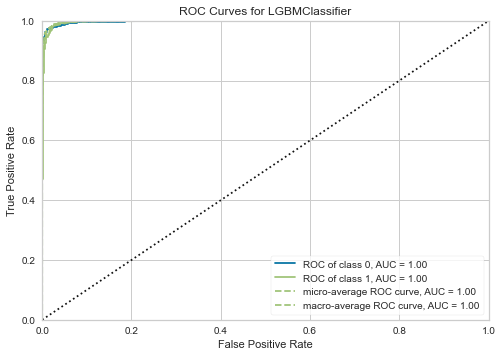

In [63]:
plot_model(lgbm, plot='auc')

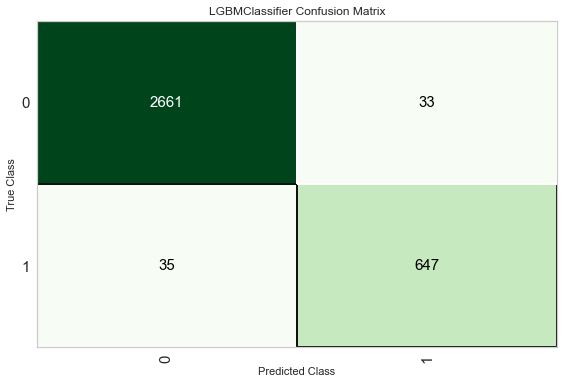

In [64]:
plot_model(lgbm, plot='confusion_matrix')

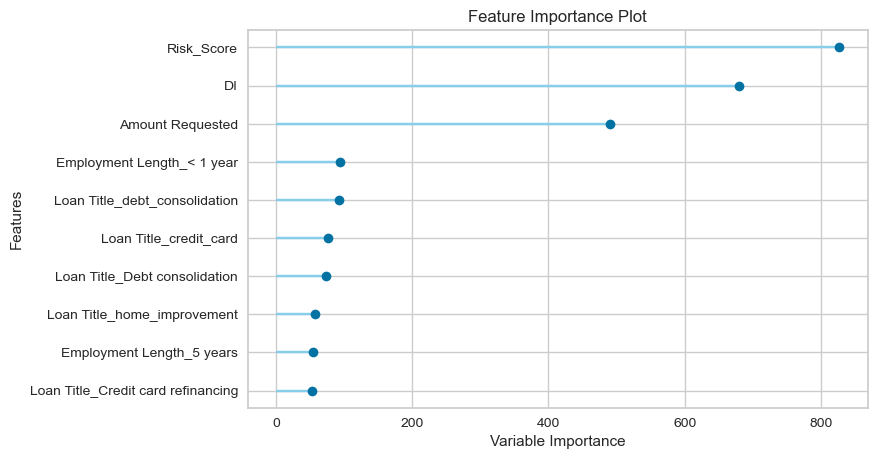

In [65]:
plot_model(lgbm, plot='feature')